<a href="https://colab.research.google.com/github/emnunluuu/imageproccesing/blob/main/lastprojectcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
!pip install -r /content/sample_data/requirements.txt



In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# 1. Veri Yolları
base_dir = '/content/sample_data'  # Ana veri klasörünüz
train_dir = os.path.join(base_dir, 'trainn')
val_dir = os.path.join(base_dir, 'validationn')
test_dir = os.path.join(base_dir, 'testt')

# 2. Veri Ön İşleme
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# 3. CNN Modeli
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 sınıf için softmax
])

# 4. Model Derleme
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. Model Eğitimi
EPOCHS = 20

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE
)

# 6. Model Testi
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Doğruluğu: {test_acc * 100:.2f}%")

# 7. Modeli Kaydetme
model.save('cnn_weed_detection_model.h5')


Found 1067 images belonging to 3 classes.
Found 305 images belonging to 3 classes.
Found 152 images belonging to 3 classes.
Epoch 1/20
33/33 [==============================] - 50s 1s/step - loss: 1.1215 - accuracy: 0.4792 - val_loss: 0.7524 - val_accuracy: 0.6285
Epoch 2/20
33/33 [==============================] - 47s 1s/step - loss: 0.7740 - accuracy: 0.6367 - val_loss: 0.7674 - val_accuracy: 0.6076
Epoch 3/20
33/33 [==============================] - 46s 1s/step - loss: 0.6390 - accuracy: 0.7324 - val_loss: 1.0421 - val_accuracy: 0.6771
Epoch 4/20
33/33 [==============================] - 48s 1s/step - loss: 0.5558 - accuracy: 0.7768 - val_loss: 0.3190 - val_accuracy: 0.8785
Epoch 5/20
33/33 [==============================] - 48s 1s/step - loss: 0.4899 - accuracy: 0.8182 - val_loss: 0.3351 - val_accuracy: 0.8819
Epoch 6/20
33/33 [==============================] - 46s 1s/step - loss: 0.4224 - accuracy: 0.8464 - val_loss: 0.3485 - val_accuracy: 0.8646
Epoch 7/20
33/33 [==================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt


1/1 [==============================] - 0s 163ms/step
Tahmin Edilen Sınıf: Rust


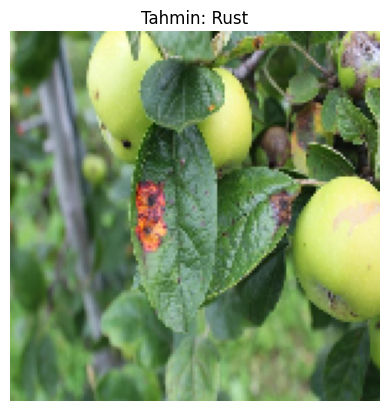

In [6]:
# Test edilecek bir görüntü seçin
image_path = '/content/sample_data/testt/Rust/8be353aeae464893_jpg.rf.df59dabe3175e526b45ba54cb665a976.jpg'  # Sağlıklı bir görüntü yolu

# Görüntüyü yükleyin ve ön işleme alın
img = load_img(image_path, target_size=IMG_SIZE)
img_array = img_to_array(img) / 255.0  # Normalize edin
img_array = np.expand_dims(img_array, axis=0)  # Batch boyutu ekleyin

# Tahmin yapın
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Sınıfları haritalandırma
class_labels = list(test_generator.class_indices.keys())
print(f"Tahmin Edilen Sınıf: {class_labels[predicted_class[0]]}")

# Görüntüyü ve tahmini göster
plt.imshow(img)
plt.title(f"Tahmin: {class_labels[predicted_class[0]]}")
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 27ms/step
Tahmin Edilen Sınıf: Powdery


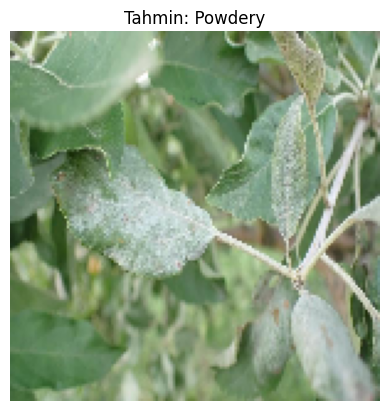

In [7]:
# Test edilecek bir görüntü seçin
image_path = '/content/sample_data/testt/Powdery/85e269f2ca36761c_jpg.rf.6bcde7d9ca25fcd2847271b5363f720f.jpg'  # Sağlıklı bir görüntü yolu

# Görüntüyü yükleyin ve ön işleme alın
img = load_img(image_path, target_size=IMG_SIZE)
img_array = img_to_array(img) / 255.0  # Normalize edin
img_array = np.expand_dims(img_array, axis=0)  # Batch boyutu ekleyin

# Tahmin yapın
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Sınıfları haritalandırma
class_labels = list(test_generator.class_indices.keys())
print(f"Tahmin Edilen Sınıf: {class_labels[predicted_class[0]]}")

# Görüntüyü ve tahmini göster
plt.imshow(img)
plt.title(f"Tahmin: {class_labels[predicted_class[0]]}")
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 25ms/step
Tahmin Edilen Sınıf: Healthy


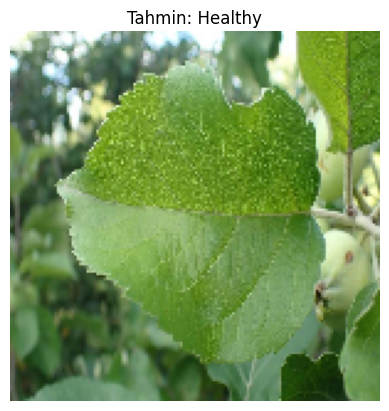

In [8]:
# Test edilecek bir görüntü seçin
image_path = '/content/sample_data/testt/Healthy/80f4549ce81eefe1_jpg.rf.cfb15a818102204ca37432185879d316.jpg'  # Sağlıklı bir görüntü yolu

# Görüntüyü yükleyin ve ön işleme alın
img = load_img(image_path, target_size=IMG_SIZE)
img_array = img_to_array(img) / 255.0  # Normalize edin
img_array = np.expand_dims(img_array, axis=0)  # Batch boyutu ekleyin

# Tahmin yapın
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Sınıfları haritalandırma
class_labels = list(test_generator.class_indices.keys())
print(f"Tahmin Edilen Sınıf: {class_labels[predicted_class[0]]}")

# Görüntüyü ve tahmini göster
plt.imshow(img)
plt.title(f"Tahmin: {class_labels[predicted_class[0]]}")
plt.axis('off')
plt.show()


In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
# Test verilerinin bulunduğu yol
test_dir = '/content/sample_data/testt'

# Test verilerini yükleme
IMG_SIZE = (150, 150)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Model ile tahmin yap
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())


Found 152 images belonging to 3 classes.
5/5 [==============================] - 3s 473ms/step


In [11]:
# Sınıflandırma raporunu oluştur
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Sınıflandırma Raporu:")
print(report)


Sınıflandırma Raporu:
              precision    recall  f1-score   support

     Healthy       0.95      1.00      0.97        53
     Powdery       1.00      0.98      0.99        49
        Rust       1.00      0.96      0.98        50

    accuracy                           0.98       152
   macro avg       0.98      0.98      0.98       152
weighted avg       0.98      0.98      0.98       152



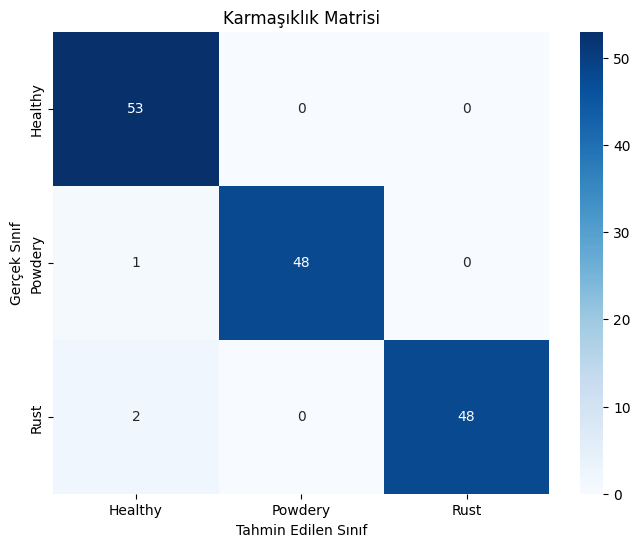

In [12]:
# Karmaşıklık Matrisi
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()
